## Data Project from Linkfire

The data set provided (traffic.csv) contains web traffic data ("events") from a few different pages ("links") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.

Our goal is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas on how to increase the links' click rates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions.

### Exploratory Data Analysis
Before we begin to answer the questions, we are going to perform some preliminary analyses to get more familiar with the data. We will start by loading the required libraries. We'll use Pandas to create and analyse the data set and we will use Scipy to calculate some statistics. For some mathematical operations, the Numpy library may come in handy, as it is the most popular library in Python for linear algebra and various mathematical operations.

In [110]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

We can use Pandas' read_csv() method to load the CSV data set into a Pandas Dataframe object.



In [2]:
df = pd.read_csv(r'D:\Data set\traffic.csv')

# printing the first five rows
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [3]:
# (#rows, #columns)
df.shape

(226278, 9)

We use the describe() method to print some descriptive statistics about each column. We can observe the number of non-null values in the count row, then the number of unique values, followed by the most frequent value and its count. Because all of our columns are of type object, as we can see in the output of the info() method in the next cell below, the descriptive statistics provide a summary that is relevant to a categorical attribute. If, for example, we were to have a numerical column, the describe() method would output different properties, like mean, max, min value, etc.

In [4]:
# print descriptive statistics about each column
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


### Question 1
#### How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In the preliminary analysis, we observed that the pageview event is the most frequent event in the data and that there are 3 types of events in the data.

In [6]:
# the data set records three types of events: pageview, click, preview

df['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [7]:
df[df['event'] == 'pageview'].groupby('date')['event'].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [12]:
df_dup = df.drop_duplicates()
df_dup['event'].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

Please note that we allow for duplicates in the data, i.e., if the same user views the same page multiple times, it will be counted each time. We can use df.drop_duplicates() to modify this behaviour and see the difference. The following cells illustrate the difference in the data caused after deduplicating: the number of events lowers by nearly half.

In [13]:
df_dup[df_dup['event'] == 'pageview'].groupby('date')['event'].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

### Question 2
#### What about the other recorded events?

In [38]:
# get the set of recorded events in the data
recorded_events = set(df['event'].unique())

Even though we know that there are only two other recorded events in our data, namely click and preview, instead of hard-coding them in our solution, we are going to apply some set operations to provide a better approach that would generalize to other events as well. Data is constantly changing in the real world, and if were to add (or even remove) an event from our data set the following solution would still work.

In the first line in the cell below we obtain the set of all unique events in the data. Then, we remove the pageview event because it was already analysed in the previous question. We will deal with whatever events remain.

In [40]:
# remove 'pageview' event
recorded_events.remove('pageview')
print(recorded_events)

{'preview', 'click'}


In [62]:
# loop over each event
for events in recorded_events:
    # get the total number of occurrences
    total_events = df[df['event'] == events].shape[0]
    print(f'Total no. of {events} events is total_events \n')
    # group by the date and aggregate by count
    data = df[df['event'] == events].groupby('date')['event'].count()
    print(f'{events} event distributed per day:\n')
    print(f'{data} \n')

Total no. of preview events is total_events 

preview event distributed per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 

Total no. of click events is total_events 

click event distributed per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 



### Question 3
#### Which countries did the clicks come from?

* We need to filter for the click events only.
* We can print the unique values of the Country column (ignoring any nans)

In [63]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [68]:
# filter for the proper event
df_click = df[df['event'] == 'click']
df_click

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
83807,click,2021-08-20,Saudi Arabia,Riyadh,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
83808,click,2021-08-20,United States,Atlanta,Lil Durk,Signed to the Streets 25,India,USUYG1164683,af483035-a62c-485c-8e98-257f35e23b4d
83809,click,2021-08-20,Bahrain,Unknown,Tundra Beats,Beautiful Day,Beautiful Day,QZHN92194591,e849515b-929d-44c8-a505-e7622f1827e9
83810,click,2021-08-20,Germany,Wehr,Hoàng Read,The Magic Bomb,The Magic Bomb - Extended Mix,FR59R2143389,8f990f44-6a5d-4294-ab0b-f74e0a8f3b25


In [71]:
# or alternatively, you can loop over the array provided by df.unique() and print them all
pd.DataFrame(data=df_click['country'].dropna().unique(), columns=['Country'])

,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


There are 202 countries where we have recorded click events, while there are 211 unique countries in the entire data set, meaning that there are 9 countries where we have not recorded a click event. An obvious follow up question would be to find out which are those 9 countries.

It can be answered with a simple set operation: we take the difference between the set of countries in the entire data set and the set of countries in the data set that we filtered here.

In [75]:
set(df['country'].unique()).difference(set(df_click['country'].unique()))

{'Afghanistan',
 'Andorra',
 'Faroe Islands',
 'Guinea-Bissau',
 'Jersey',
 'Lesotho',
 'Macao',
 'Samoa',
 'Sint Maarten'}

### Question 4
#### What was the overall click rate (clicks/pageviews)?

The click rate is the number of clicks that a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). It is a commonly used metric that measures the success of an advertising campaign.

Its calculation requires a few steps.

To start with, we can count the number of times each link has been clicked on, and the number of times each link has been viewed. The same procedure applies to both calculations. We first filter for the proper event (click or pageview), then we group the filtered data by the link Id and count the occurrences of that event.

In [93]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link

link_clicks = df[df['event'] == 'click'].groupby('linkid')['event'].count().reset_index()

# We rename the grouped column for easier manipulation and reset the index of the Dataframe
link_clicks.rename(columns={'event':'clicks'}, inplace=True)

# do the same for the 'pageview' events
pageviews = df[df['event'] == 'pageview'].groupby('linkid')['event'].count().reset_index()
pageviews.rename(columns={'event':'pageviews'}, inplace=True)

In [91]:
link_click.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [92]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the answer, we need to somehow join these two Dataframes on the same link Id, and then divide the number of clicks by the number of page views to get the required click rate. It can be achieved with Pandas' merge() method. We specify a 'left' and a 'right' Dataframe, a column to merge on, and how the merge should go (we specify 'inner' which takes the intersection of the two data sets).

In [102]:
# pd.merge() does a database-style join of the two dataframes
df_merged = pd.merge(link_click, pageviews, on='linkid', how='inner')

# define a new column of the 'click_rate'
df_merged['click-rate'] = df_merged['clicks'] / df_merged['pageviews']

In [108]:
df_merged

,linkid,clicks,pageviews,click-rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


### Question 5
#### How does the clickrate distribute across different links?

To get a sense of the distribution of the click rate across different links, we can use that same method. The cell below does that. Observe the output. We have the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.

In [109]:
df_merged['click-rate'].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click-rate, dtype: float64

Tabular data can only give us so much, and a picture says a thousand words, so whenever you can, use graphics to present your findings. In our case, we can do that, and in multiple ways. For instance, we can plot the distribution of the click rate as a histogram.

Using the powerful plot() method we plot a histogram with 100 bins. Notice how we provide parameters for the figure size and the label of the X-axis. It is always a good idea to have these as they provide a lot of context at first glance, and make the interpretation of the graphic a lot easier and quicker. Try to ignore or play around with these parameters and observe the output.

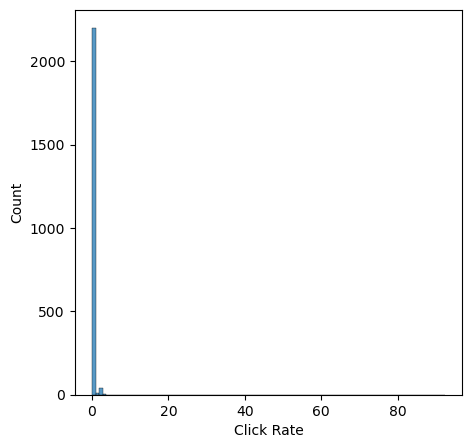

In [125]:
plt.figure(figsize=(5, 5))
sns.histplot(data = df_merged, x='click-rate', bins=100)
plt.xlabel('Click Rate')
plt.show()

The histogram shows that the data is highly skewed to left, i.e., many of its values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's log2() method for it!

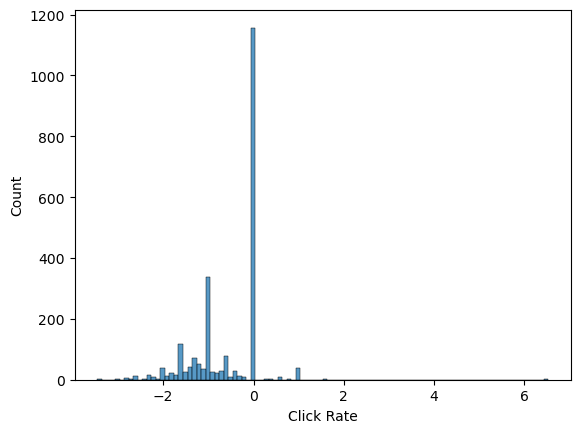

In [127]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_merged['click-rate-log'] = np.log2(df_merged['click-rate'])

sns.histplot(data = df_merged, x='click-rate-log', bins=100)
plt.xlabel('Click Rate')
plt.show()

We observe an enormous spike at the 0 meaning that the actual click rate was 1, implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero).

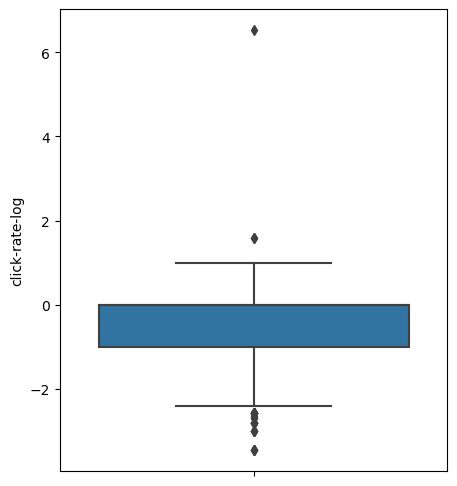

In [135]:
plt.figure(figsize=(5,6))
sns.boxplot(data = df_merged, y='click-rate-log')
plt.show()

We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.

### Question 6
#### Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

Pearson's correlation coefficient is a measure of linear correlation between two data sets. It takes its value in the range of [-1, 1] and the further it is from zero, the more significant the correlation is. If the value is negative, it means that the values in one set of the data decrease as the values in the other set increase. A positive correlation coefficient implies that both sets of values move in the same direction, either they both increase or decrease.

Pearson's coefficient is implemented in both Pandas and Scipy, and here we are actually going to use both libraries, just to explore their APIs and to compare results! (should be the same).

First, let us filter the data to contain only the click and the preview events. We can describe it to get a sense of the contents.

In [143]:
# filter only events that are relevant to the question
df_filtered = df [df['event'].isin(['click', 'preview'])]
df_filtered.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


In [144]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link

link_clicks = df[df['event'] == 'click'].groupby('linkid')['event'].count().reset_index()

# We rename the grouped column for easier manipulation and reset the index of the Dataframe
link_clicks.rename(columns={'event':'clicks'}, inplace=True)

# do the same for the 'pageview' events
pageviews = df[df['event'] == 'preview'].groupby('linkid')['event'].count().reset_index()
pageviews.rename(columns={'event':'previews'}, inplace=True)

In [145]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row

df_filtered = pd.merge(df_filtered, link_clicks, on='linkid', how='inner')
df_filtered = pd.merge(df_filtered, pageviews, on='linkid', how='inner')
df_filtered

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
2,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
3,click,2021-08-20,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
4,click,2021-08-20,Romania,Topoloveni,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
...,...,...,...,...,...,...,...,...,...,...,...
79433,click,2021-08-20,United States,Hamilton,"Boosie Badazz, DaBaby",Period (feat. DaBaby),Period (feat. DaBaby),USLUU2000092,1ab371a7-3dc5-4b62-8181-b919de7385ac,1,2
79434,preview,2021-08-22,United States,Port Saint Lucie,"Boosie Badazz, DaBaby",Period (feat. DaBaby),Period (feat. DaBaby),USLUU2000092,1ab371a7-3dc5-4b62-8181-b919de7385ac,1,2
79435,preview,2021-08-20,United States,Hamilton,"Boosie Badazz, DaBaby",Period (feat. DaBaby),Period (feat. DaBaby),USLUU2000092,1ab371a7-3dc5-4b62-8181-b919de7385ac,1,2
79436,click,2021-08-25,Pakistan,Unknown,Melanie Martinez,Cry Baby (Deluxe Edition),Play Date,USAT21502462,028ab79b-048d-4e96-a930-f08356783049,1,1


Finally, we calculate the correlation coefficient with both pandas and scipy.

In [146]:
df_filtered.corr()

,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


In [149]:
stats.pearsonr(x=df_filtered['clicks'], y=df_filtered['previews'])

PearsonRResult(statistic=0.9987125072008429, pvalue=0.0)

Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vice versa).

Using pd.factorize() we can quantify the relationship between categorical variables in similar manner as with numerical variables.

In [150]:
df_filtered.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid', 'clicks', 'previews'],
      dtype='object')

In [169]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_filtered[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.315450,0.080973,0.088781,0.089710
city,0.315450,1.000000,0.232711,0.239184,0.243887
artist,0.080973,0.232711,1.000000,0.946371,0.949177
album,0.088781,0.239184,0.946371,1.000000,0.976958
track,0.089710,0.243887,0.949177,0.976958,1.000000


We observe a high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.